Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [1]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [ ]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
%cd TDDI2022/
# Klasörün içeriğinin görülmesi için
%ls

Veri İskeleti TDDI2022 klasöründe bulunan yarışma kapsamında yarışmacılara sağlanan **Resmi Gazeteum-nlp-doc-analysis-dataset.csv** dosyasının içindeki verileri pandas ile okuyarak oluşturulacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [69]:
df = pd.read_csv('kanunum-nlp-doc-analysis-dataset.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4142 non-null   int64  
 1   kategori        4142 non-null   object 
 2   baslik          4142 non-null   object 
 3   rega_no         2527 non-null   object 
 4   mukerrer_no     3642 non-null   float64
 5   rega_tarihi     2527 non-null   object 
 6   kurum           2488 non-null   object 
 7   mevzuat_no      1091 non-null   object 
 8   belge_sayi      43 non-null     object 
 9   mevzuat_tarihi  1905 non-null   object 
 10  donem           500 non-null    object 
 11  sira_no         500 non-null    object 
 12  madde_sayisi    4142 non-null   int64  
 13  data_text       4142 non-null   object 
 14  url             4142 non-null   object 
 15  kanunum_url     4142 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 517.9+ KB


Veri İskeletinde **kategori** sütununun / alanının kaç gruptan ve bu grupların kaç satırdan / kayıttan oluştuğu ekrana yazdırılacaktır.

In [70]:
print(df.groupby('kategori').size())

kategori
Cumhurbaşkanlığı Kararnamesi     54
Genelge                         385
Kanun                           514
Kanun Hükmünde Kararname         91
Komisyon Raporu                 500
Resmi Gazete                    546
Tebliğ                          623
Tüzük                            82
Yönetmelik                      597
Özelge                          750
dtype: int64


Veriler üzerinde yaptığımız ön çalışmada (ekrana data_text sütunundan / alanından bir kaç satır yazdırılmış ve içerikleri incelenmiştir) veri kümesinin data_text sütunundaki / alanındaki içerik iki parçaya ayrılabileceği görülmüştür. Böylelikle data_text sütunu / alanı işlenirken belgeye ait bilgiler birinci parçada belgenin içeriği ikinci parçada görülebilir. Tüm data_text kayıtlarında yer alan ortak bir noktanın varlığını kontrol etmek için aşağıdaki kod yardımı ile resmi belgelerin hepsinde ikiye bölme yapabilir miyiz kontrol edelim.

In [75]:
kayitSayisi, alanSayisi = df.shape
say = 0
satirToplami, sutunToplami = df.shape
for satir in range(satirToplami):
  if (str(df['data_text'][satir]).replace(' ','').lower().find('madde')!=-1):
    say+=1
  else:
    pass
if say==kayitSayisi:
  print(say,'=',kayitSayisi,'yani data_text alanındaki toplam kayıt sayısı ve her bir kayıtta "1. veya 1 -" verisini içeren kayıt sayısı birbirine eşittir.')
else:
  print('4142 dokümandan',4142-say,'tanesi kayıt hariç dokümanları belirttiğimiz yerden ikiye bölebiliriz!')

4142 dokümandan 175 tanesi kayıt hariç dokümanları belirttiğimiz yerden ikiye bölebiliriz!


In [76]:
kayitSayisi, alanSayisi = df.shape
say = 0
satirToplami, sutunToplami = df.shape
for satir in range(satirToplami):
  if (str(df['data_text'][satir]).replace(' ','').lower().find('madde')!=-1)or((str(df['data_text'][satir]).replace(' ','').lower().find('sayı')!=-1)):
    say+=1
  else:
    print('Belgeyi ikiye bölme kuralına uymayan satır numarası:',satir)
if say==kayitSayisi:
  print(say,'=',kayitSayisi,'yani data_text alanındaki toplam kayıt sayısı ve her bir kayıtta "1. veya 1 -" verisini içeren kayıt sayısı birbirine eşittir.')
else:
  print('4142 dokümandan',4142-say,'tanesi kayıt hariç dokümanları belirttiğimiz yerden ikiye bölebiliriz!')

Belgeyi ikiye bölme kuralına uymayan satır numarası: 1383
Belgeyi ikiye bölme kuralına uymayan satır numarası: 1463
Belgeyi ikiye bölme kuralına uymayan satır numarası: 1749
Belgeyi ikiye bölme kuralına uymayan satır numarası: 4106
4142 dokümandan 4 tanesi kayıt hariç dokümanları belirttiğimiz yerden ikiye bölebiliriz!


Örnek bir kayıtta ikiye bölmeyi deneyelim. Bölemediğimiz kayıt olursa da ilk 300 karakteri alalım.

In [77]:
satir = 600
icerik = str(df['data_text'][satir]).replace(' ','').lower()
b1 = icerik.find('sayı')
b2 = icerik.find('madde')
bolmeYeri = b2 if b2!=-1 else b1 if b1!=-1 else 300
print(b1,b2,bolmeYeri)
print(icerik[:bolmeYeri])
print(100*'-')
print(df['data_text'][satir][:500]) #Orijinal verinin ilk 500 karakteri ile karşılaştıralım

117 330 330
t.c
resmîgazete

kuruluştarihi:(7teşrinievvel1336)-7ekim1920

yönetimveyazıi̇şlerii̇çin
başbakanlıkneşriyat11ocak1985sayı:18632dairebaşkanlığınacuma

sayı:18632
başvurulurcuma

yürütmevei̇darebölümü

atamakararları
millisavunmabakanlığından:

kararsayısı:85-30988
1.357sayılıaskerihakimlerkanununa1611sayılıkanunlaeklenenek-3

ncü
----------------------------------------------------------------------------------------------------
T.C 
Resmî Gazete 

Kuruluş Tarihi : (7 Teşrinievvel 1336)-7 Ekim 1920 

Yönetim ve Yazı İşleri İçin 
Başbakanlık Neşriyat 11 Ocak 1985 Sayı : 18632 Daire Başkanlığına CUMA 

Sayı : 18632 
başvurulur CUMA 

Y Ü R Ü T M E V E İ D A R E B Ö L Ü M Ü 

Atama Kararları 
M i l l i S a v u n m a Bakanlığından : 

Karar Sayısı : 85 - 30988 
1. 357 sayılı A s k e r i H a k i m l e r K a n u n u n a 1611 sayılı K a n u n l a e k l e n e n E K - 3 

ncü m a d d e s i hükmüne i s t i n a d e n M i l l i S a


Yukarıdaki bulgular doğrultusunda içeriği bölerken önce ilk maddesini eğer maddesi yoksa ilk sayı kelimesini gördüğümüz yerde ikiye bölerek **belge ile ilgili verileri toplayabileceğimiz baş kısmı** alacağız!

Resmi gazete olarak kategori edilen toplam 546 adet kayıt vardı. Bu kayıtlar üzerinde belge türü tespit etmek için bir fonksiyon oluşturup veriyi burada analiz etmek ve analizimizin sonucunu mevcut 546 kayıttan kaçında doğru sonuç veridğini kontrol etmek yöntemimizin doğruluğu hakkında bize bilgi verecektir.

In [78]:
# Resmi Gazete kategorisini bulmak için çalışacak fonksiyonumuz
def kategoriBulREGA(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  icerik = str(verilenMetin).lower()
  icerik = icerik.replace(' ','')
  icerik = icerik.replace('\n','')
  icerik = icerik.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında kuralımıza göre kontrol yapacağız!
  if (icerik.find('resm')!=-1) or (icerik.find('gazete')!=-1) or (icerik.find('başbakanlık')!=-1) or (icerik.find('teşrinievvel1336')!=-1) or (icerik.find('1336-1920')!=-1):
    return 'Resmi Gazete'

# 546 kayıt arasında kaç tanesinin resmi gazete olarak işaretlenmediğini sayacak hataSayisi değişkenine ilk değer olarak 0 SIFIR veriyoruz.
hataSayisi=0

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

# Sadece Resmi Gazete kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  if df['kategori'][satir]!='Resmi Gazete':
    continue
  # Verimizi daha önce izah ettiğimiz gibi iki parcaya ayırıp ilk parçayı alıyoruz!
  b1, b2 = icerik.find('sayı'), icerik.find('madde')
  bolmeYeri = b2 if b2!=-1 else b1 if b1!=-1 else 300
  arastirilacakParca = df['data_text'][satir][:bolmeYeri]
  if kategoriBulREGA(arastirilacakParca)!=df['kategori'][satir]:
    print(df['kategori'][satir],100*'-')
    print(arastirilacakParca[:300])
    hataSayisi+=1

print(hataSayisi)

Resmi Gazete ----------------------------------------------------------------------------------------------------
28 Ağustos 1977 
PAZAR Sayı : 16041 

YÜRÜTME V E İDARE BÖLÜMÜ 

Bakanlar Kurulu Kararı 
Karar Sayısı : 7/13661 
İlişik «Türk Silahlı Kuvvetleri Kıyafet Kararının Bazı Maddelerinin Değiştiril

mesi Hakkında Karar'ın yürürlüğe konulması; Millî Savunma Bakanlığının 19/4/1977, 
27/7/1977 tarihli ve 197
Resmi Gazete ----------------------------------------------------------------------------------------------------
26/2/1962 

1928 - 1960 Bütçe yıllarına ait olup da Muhasebel Umumiye Ka
nununun 93 üncü maddesine göre zamanaşımına uğramamış vc kar
şılıkları yıllan bütçelerinde bulunan borç'ar, 1962 yılı Bütçesinin ilgili 
hizmet tertip'erinden veya 3-6 ncı kıslm bölümleriyle yatırım bö
lümleri bakiyelerinden es
2


Resmi Gazete kategorisnde bulduğumuz yöntemin 2 hata ile çalıştığını gördük. Karmaşıklık matrisi ile bu yöntemimizin ne kadar doğru çalıştığını Resmi Gazete kategorisi dışında da test etmek gerekir.

Kaynak 1: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.

Kaynak 2: https://en.wikipedia.org/wiki/Confusion_matrix

In [80]:
# Resmi Gazete kategorisini bulmak için çalışacak fonksiyonumuz
def kategoriBulREGA(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  icerik = str(verilenMetin).lower()
  icerik = icerik.replace(' ','')
  icerik = icerik.replace('\n','')
  icerik = icerik.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında kuralımıza göre kontrol yapacağız!
  if (icerik.find('resm')!=-1) or (icerik.find('gazete')!=-1) or (icerik.find('başbakanlık')!=-1) or (icerik.find('teşrinievvel1336')!=-1) or (icerik.find('1336-1920')!=-1):
    return 'Resmi Gazete'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

# Tüm kategorilerde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  # Verimizi daha önce izah ettiğimiz gibi iki parcaya ayırıp ilk parçayı alıyoruz!
  b1, b2 = icerik.find('sayı'), icerik.find('madde')
  bolmeYeri = b2 if b2!=-1 else b1 if b1!=-1 else 300
  arastirilacakParca = df['data_text'][satir][:bolmeYeri]
  fonksiyonumuzunCiktisi = kategoriBulREGA(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Resmi Gazete' and df['kategori'][satir]=='Resmi Gazete':
    # Fonksiyonumuz Resmi Gazete olan kategoriyi Resmi Gazete olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Resmi Gazete Değil' and df['kategori'][satir]=='Resmi Gazete':
    # Fonksiyonumuz Resmi Gazete olan kategoriyi Resmi Gazete olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Resmi Gazete' and df['kategori'][satir]!='Resmi Gazete':
    # Fonksiyonumuz Resmi Gazete olmayan kategoriyi Resmi Gazete olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz Resmi Gazete olmayan kategoriyi Resmi Gazete olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Doğruluk (Accuracy):',(TP + TN) / satirToplami)
print('Keskinlik (Precision):',TP / (TP+FP) )
print('Hassasiyet (Sensitivity) / Duyarlılık (Recall):',TP / (TP+FN) )
print('Özgüllük (Specificity):',TN / (TN+FP) )
print('F1-Puanı (F1 Score):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

4142
544 1513 2085 0
Doğruluk (Accuracy): 0.49661999034282955
Keskinlik (Precision): 0.20692278432864206
Hassasiyet (Sensitivity) / Duyarlılık (Recall): 1.0
Özgüllük (Specificity): 0.42051139521956643
F1-Puanı (F1 Score): 0.6595840362972871


Keskinlik değerinin çok düşük olmasından dolayı fonksiyonumuzu güncellememiz gerekiyor!

In [82]:
# Resmi Gazete kategorisini bulmak için çalışacak fonksiyonumuz
def kategoriBulREGA(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  icerik = str(verilenMetin).lower()
  icerik = icerik.replace(' ','')
  icerik = icerik.replace('\n','')
  icerik = icerik.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında kuralımıza göre kontrol yapacağız!
  if (icerik.find('başbakanlık')!=-1) or (icerik.find('teşrinievvel1336')!=-1) or (icerik.find('1336-1920')!=-1):
    return 'Resmi Gazete'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

# Tüm kategorilerde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  # Verimizi daha önce izah ettiğimiz gibi iki parcaya ayırıp ilk parçayı alıyoruz!
  b1, b2 = icerik.find('sayı'), icerik.find('madde')
  bolmeYeri = b2 if b2!=-1 else b1 if b1!=-1 else 300
  arastirilacakParca = df['data_text'][satir][:bolmeYeri]
  fonksiyonumuzunCiktisi = kategoriBulREGA(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Resmi Gazete' and df['kategori'][satir]=='Resmi Gazete':
    # Fonksiyonumuz Resmi Gazete olan kategoriyi Resmi Gazete olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Resmi Gazete Değil' and df['kategori'][satir]=='Resmi Gazete':
    # Fonksiyonumuz Resmi Gazete olan kategoriyi Resmi Gazete olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Resmi Gazete' and df['kategori'][satir]!='Resmi Gazete':
    # Fonksiyonumuz Resmi Gazete olmayan kategoriyi Resmi Gazete olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz Resmi Gazete olmayan kategoriyi Resmi Gazete olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Doğruluk (Accuracy):',(TP + TN) / satirToplami)
print('Keskinlik (Precision):',TP / (TP+FP) )
print('Hassasiyet (Sensitivity) / Duyarlılık (Recall):',TP / (TP+FN) )
print('Özgüllük (Specificity):',TN / (TN+FP) )
print('F1-Puanı (F1 Score):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

4142
453 3611 78 0
Doğruluk (Accuracy): 0.9811685176243361
Keskinlik (Precision): 0.8531073446327684
Hassasiyet (Sensitivity) / Duyarlılık (Recall): 1.0
Özgüllük (Specificity): 0.9788560585524533
F1-Puanı (F1 Score): 0.9313585011026713


Bulunan TP, TN, FP ve FN değerlerine göre Karmaşıklık Matrisi görselleştirilecektir.

Kaynak 1: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.

Kaynak 2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

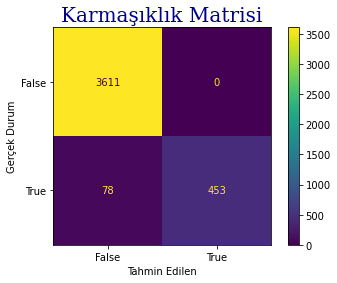

In [83]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline

karmasiklikMatrisi = np.array([[TN,FN],[FP,TP]])
kM_gorsel = metrics.ConfusionMatrixDisplay(confusion_matrix = karmasiklikMatrisi, display_labels = [False, True])

kM_gorsel.plot()
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.title("Karmaşıklık Matrisi", fontdict = {'family':'serif','color':'Darkblue','size':20})

plt.show()

# ***ÇIKARIM:***

**kategoriBulResmi Gazete** isimli fonksiyonumuz 4142 adet kayıt içinde belge türü tahmini yapmıştır.,

- 546 Resmi Gazete belgesinin 453 tanesini Resmi Gazete belgesi türü olarak tespit etmiştir.
- 78 Resmi Gazete belgesi olmayan belgeyi de Resmi Gazete belgesi olarak tespit etmiştir.
- 3611 Resmi Gazete belgesi olmayan belgeyi de Resmi Gazete belgesi olmayan belge olarak tespit etmiştir.